In [1]:
## Read the read.md and requirements txt for installation of all libraries

import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from wordcloud import WordCloud


In [2]:
att = pd.read_csv('attributes.csv')
desc = pd.read_csv('product_descriptions.csv')
test = pd.read_csv('test.csv', encoding='ISO-8859-1')
train = pd.read_csv('train.csv', encoding='ISO-8859-1')
n_train = len(train)

In [3]:
train_pid_set = set(train['product_uid'])
print(len(train_pid_set))

test_pid_set = set(test['product_uid'])
print(len(test_pid_set))

att_pid_set = set(att['product_uid'])
print(len(att_pid_set))

desc_pid_set = set(desc['product_uid'])
print(len(desc_pid_set))

54667
97460
86418
124428


In [4]:
train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74067 entries, 0 to 74066
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             74067 non-null  int64  
 1   product_uid    74067 non-null  int64  
 2   product_title  74067 non-null  object 
 3   search_term    74067 non-null  object 
 4   relevance      74067 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


In [6]:
len(train['product_uid'].unique())

54667

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.75       11
2.25       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64


<AxesSubplot:>

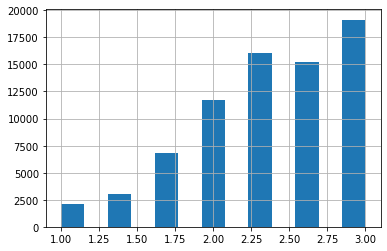

In [7]:
print(train['relevance'].value_counts())
train['relevance'].hist(bins=13)

3     26575
2     18386
4     14847
5      6601
1      4503
6      2076
7       741
8       204
9        80
11       31
10       10
12        9
14        4
dtype: int64


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

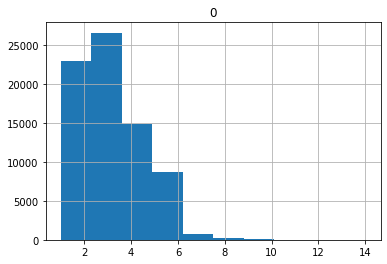

In [8]:
training_st_token_len = DataFrame(Series(list(map(lambda x: len(x.split()), train['search_term'].tolist()))))
print(training_st_token_len.value_counts())
training_st_token_len.hist()

In [9]:
test.head(6)

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668
5,8,100001,Simpson Strong-Tie 12-Gauge Angle,wood connectors


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166693 entries, 0 to 166692
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             166693 non-null  int64 
 1   product_uid    166693 non-null  int64 
 2   product_title  166693 non-null  object
 3   search_term    166693 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.1+ MB


In [11]:
test['product_uid'].nunique()

97460

3     56420
2     51329
4     28100
1     12772
5     12004
6      4004
7      1241
8       469
9       145
10      104
12       54
11       46
14        4
13        1
dtype: int64


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

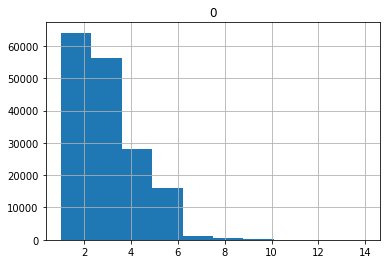

In [12]:
testing_st_token_len = DataFrame(Series(list(map(lambda x: len(x.split()), test['search_term'].tolist()))))
print(testing_st_token_len.value_counts())
testing_st_token_len.hist()

11795


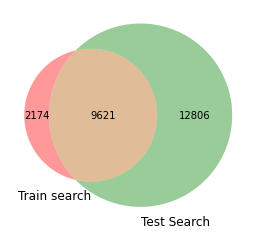

In [13]:
print(train['search_term'].nunique())
test['search_term'].nunique()
venn2([set(train['search_term']), set(test['search_term'])], ('Train search', 'Test Search'))
plt.show()

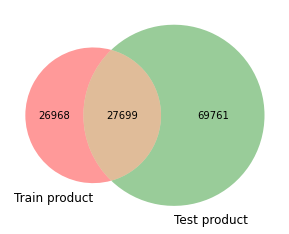

In [14]:
venn2([set(train['product_uid']), set(test['product_uid'])], ('Train product', 'Test product'))
plt.show()

In [15]:
desc.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [16]:
desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124428 entries, 0 to 124427
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   product_uid          124428 non-null  int64 
 1   product_description  124428 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [17]:
print(len(desc['product_uid']))

124428


In [18]:
desc['product_description'][116638]
# you can input any ID you want, it will describe the actual content

'Relax in comfort and style with the luxurious Spring Haven 5-Piece Patio Dining Set from Hampton Bay. Perfect for the patio, porch or sunroom, the set combines a sturdy, rust-resistant steel frame with all-weather resin for many seasons of enjoyment. Featuring four chairs and a square dining table, this set is part of the unique Choose Your Own Color program and ships with bare cushions (no slipcovers), so you can select the slipcover of your choice. Pick from a number of colors to complement your personal decor style.Bare cushions enable you to select your own color for a personal touchMulti-tone brown wicker finish creates a sophisticated lookPowder-coated, reinforced steel frame is durable and rust resistantAll-weather resin wicker resists outdoor elements for years of enjoymentDesigned for easy assemblyCoordinates with other patio furniture and accessories in the Spring Haven collection (available separately)Beautiful glass tabletop with umbrella holeMore options available, CLICK 

87     1146
76     1133
82     1127
75     1123
84     1101
       ... 
561       1
560       1
559       1
555       1
889       1
Length: 608, dtype: int64


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

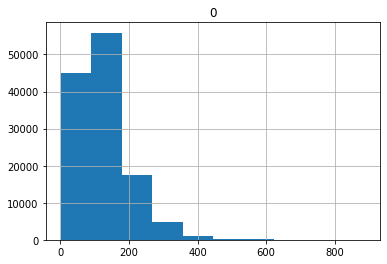

In [19]:
pd_token_len = DataFrame(Series(map(lambda x: len(x.split()), desc['product_description'].tolist())))
print(pd_token_len.value_counts())
pd_token_len.hist()

In [20]:
att.head(5)
# make it head(50 or 15, 10) so you can have a glimpse

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [21]:
att['product_uid'].nunique()

86263

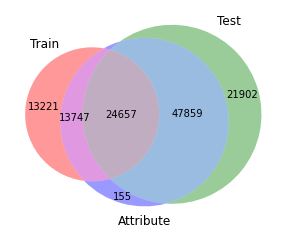

In [22]:
venn3([set(train['product_uid']), set(test['product_uid']), set(att['product_uid'])], ('Train', 'Test', 'Attribute'))
plt.show()

In [23]:
att[att['product_uid'].isnull()]

,product_uid,name,value
1929,NaN,NaN,NaN
4094,NaN,NaN,NaN
4100,NaN,NaN,NaN
6823,NaN,NaN,NaN
37309,NaN,NaN,NaN
...,...,...,...
1916113,NaN,NaN,NaN
1971357,NaN,NaN,NaN
1988903,NaN,NaN,NaN
2002980,NaN,NaN,NaN


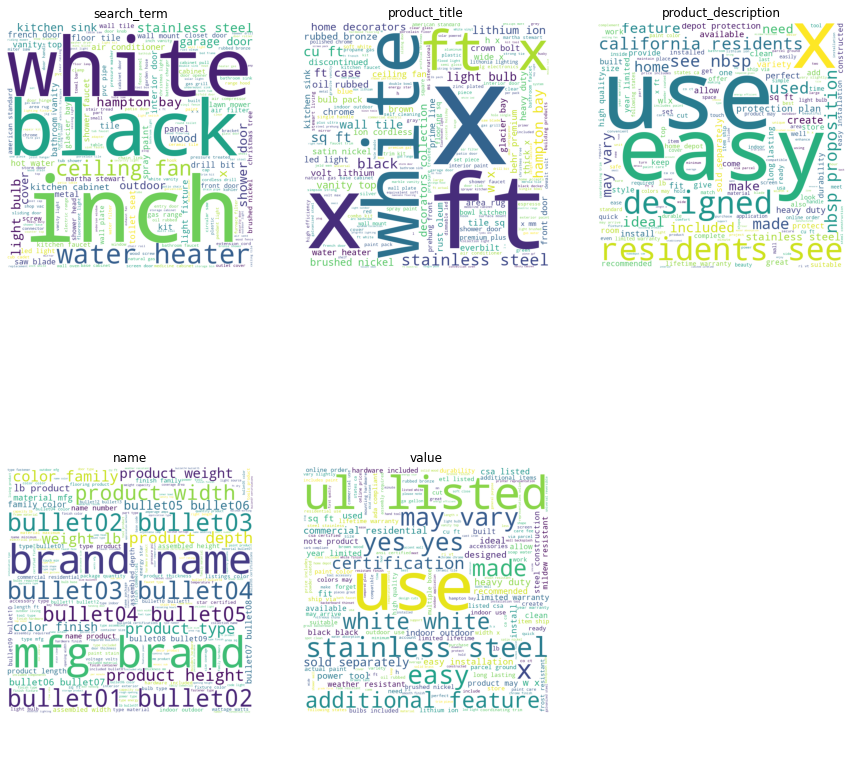

In [26]:
def display_word_cloud(name2df):
    stop_words = stopwords.words('english')
    n_col = int(np.ceil(np.sqrt(len(name2df))))
    n_row = int(np.sqrt(len(name2df)))
    
    fig, axis = plt.subplots(n_row, n_col, figsize=(15, 15))
    i = 0
    for feature_name in name2df:
        df = name2df[feature_name]
        row = i // n_col
        col = i % n_col
        text = ' '.join(df[feature_name].astype(str).str.lower().tolist())
        
        word_cloud = WordCloud(background_color='white', stopwords = stop_words, width=850, height=850).generate(text)
        axis[row][col].imshow(word_cloud)
        axis[row][col].axis('off')
        axis[row][col].set_title(feature_name)
        i += 1
        
    for k in range(i, n_row*n_col):
        row = k // n_col
        col = k % n_col
        axis[row][col].axis('off')
        k += 1
        
    plt.show()
    
name2df = {'search_term': train, 'product_title': train, 'product_description': desc, 'name': att, 'value': att}
display_word_cloud(name2df) 